# Fitbit Sleep Disruption Analysis


## Summary

* In this exploration we are trying to study if can detect the change in sleep patterns.


* The sleep data has been extracted from fitbit fitness tracker. This was done using the tools and the framework provided by [
Fitbit Data Analysis](https://github.com/MelissaSmith12/fitbit-aggregator/blob/master/Framework%20for%20Analysis.ipynb). so for this tutorial i will use the data extracted from these tools and saved in csv file.


* To study this hypothesis,We will look into differnt time frames :
    * Ramadan which is fasting month for muslims[May,16th,2018 - June, 14th,2018] 
    * Weekends versus Weekdays 


* a useful Github repo for fitbit analysis [link.](https://github.com/tuchandra/sleep-analysis/blob/master/spring-sleep-analysis.ipynb)

## contributors
* Melissa Smith [Github](https://github.com/MelissaSmith12), [Linkedin](https://www.linkedin.com/in/mkaydub/)
* Leah Erb [Github](https://github.com/leaherb), [Linkedin](https://www.linkedin.com/in/leah-erb-a06b5729/) 
* Nisrein Sada [Github](https://github.com/nesreensada), [Linkedin](https://www.linkedin.com/in/nisreinsada/)

## 1) Load the Data from the csv file 

In [1]:
# imports
from datetime import datetime
import json
import keyring
import requests
import datetime as dt

import pandas as pd 
from pprint import pprint
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_TIME, 'C')
%matplotlib inline
import scipy.stats
import csv

In [2]:
sleep_df = pd.DataFrame.from_csv('sleep_June_till_august1.csv')
sleep_df.head()

/home/nisrein/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,bed_time,deep_count,deep_minutes,efficiency,end_date,light_count,light_minutes,minutes_asleep,rem_count,rem_minutes,start_data,wake_count,wake_minutes,wakeup_time
0,23:18:30,4,74,97,2018-07-07,32,324,421,2,23,2018-07-06,32,80,07:39:30
1,23:27:00,3,90,98,2018-07-06,38,272,404,10,42,2018-07-05,44,55,07:06:00
2,22:46:30,6,124,96,2018-07-05,33,270,452,9,58,2018-07-04,36,57,07:16:00
3,23:53:30,4,85,94,2018-07-01,16,186,337,8,66,2018-06-30,19,56,06:27:00
4,23:20:30,7,121,94,2018-06-30,32,247,397,5,29,2018-06-29,30,79,07:17:00


## 2) Data Analysis 

* The fitbit sleep data contains the following useful information that we can use it for our analysis:
    * Sleep stages: deep, light, rem, and wake. 
    * Efficiency.
    * Time in bed.
      
* things we need for our analysis:
    * Day of the week 
    * Hours spent in bed
    * Extraction of certain points in dataframe to compare it with rest 


### Extract the day of the week 
Extracting the day of the week from the date of the day so that it can be used in the analysis of data.

In [3]:
sleep_df.end_date = pd.to_datetime(sleep_df.end_date)
sleep_df['day_of_week'] = sleep_df['end_date'].dt.weekday_name
sleep_df.head()

,bed_time,deep_count,deep_minutes,efficiency,end_date,light_count,light_minutes,minutes_asleep,rem_count,rem_minutes,start_data,wake_count,wake_minutes,wakeup_time,day_of_week
0,23:18:30,4,74,97,2018-07-07,32,324,421,2,23,2018-07-06,32,80,07:39:30,Saturday
1,23:27:00,3,90,98,2018-07-06,38,272,404,10,42,2018-07-05,44,55,07:06:00,Friday
2,22:46:30,6,124,96,2018-07-05,33,270,452,9,58,2018-07-04,36,57,07:16:00,Thursday
3,23:53:30,4,85,94,2018-07-01,16,186,337,8,66,2018-06-30,19,56,06:27:00,Sunday
4,23:20:30,7,121,94,2018-06-30,32,247,397,5,29,2018-06-29,30,79,07:17:00,Saturday


### Time Spent in Bed
Convert the time spent in bed from minutes to hours.

In [4]:
sleep_df['time_in_bed'] = sleep_df['minutes_asleep'].apply(lambda x: x / 60.0)
sleep_df.head()

,bed_time,deep_count,deep_minutes,efficiency,end_date,light_count,light_minutes,minutes_asleep,rem_count,rem_minutes,start_data,wake_count,wake_minutes,wakeup_time,day_of_week,time_in_bed
0,23:18:30,4,74,97,2018-07-07,32,324,421,2,23,2018-07-06,32,80,07:39:30,Saturday,7.016667
1,23:27:00,3,90,98,2018-07-06,38,272,404,10,42,2018-07-05,44,55,07:06:00,Friday,6.733333
2,22:46:30,6,124,96,2018-07-05,33,270,452,9,58,2018-07-04,36,57,07:16:00,Thursday,7.533333
3,23:53:30,4,85,94,2018-07-01,16,186,337,8,66,2018-06-30,19,56,06:27:00,Sunday,5.616667
4,23:20:30,7,121,94,2018-06-30,32,247,397,5,29,2018-06-29,30,79,07:17:00,Saturday,6.616667


If we try to visualize the time in bed from Novmeber 2017 till July 2018. We can see that from mid May till mid June i got the least sleep compared to the rest of the months which corresponds to Ramadan.  

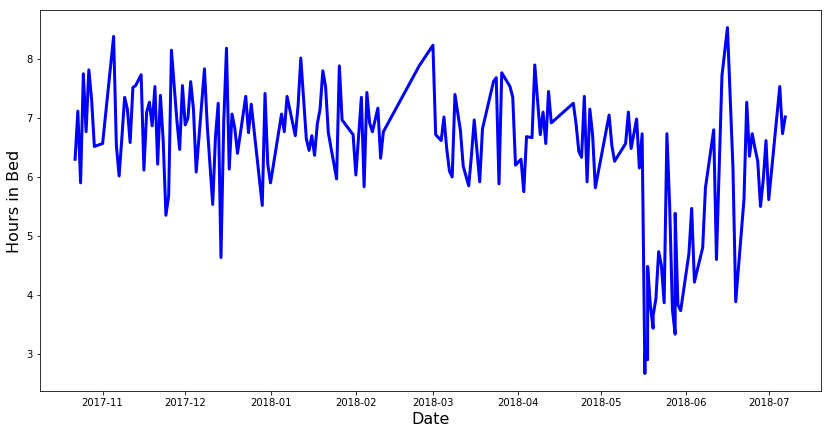

In [5]:
fig = plt.figure(figsize = (14,7))
sleep_df['time_in_bed'] = sleep_df['minutes_asleep'].apply(lambda x: x / 60.0)

plt.plot(sleep_df['end_date'],sleep_df['time_in_bed'], linestyle='-', markersize=10, color='blue', label='time_in_bed', linewidth=3.0)


plt.ylabel('Hours in Bed',fontsize = 16);
plt.xlabel('Date', fontsize=16)
plt.savefig('timeinbed.png',bbox_inches='tight')
plt.show()

In [6]:
# this function creates two dataframes one for within the event period and other other period
def extract_timeframes(start_event_date, end_event_date,df):
    df2 = df.copy()
    df2_event_period = df2[(df2['end_date'] > datetime.strptime(start_event_date, "%Y-%m-%d").date()) & (df2['end_date'] < datetime.strptime(end_event_date, "%Y-%m-%d").date())]
    df2_rest_period = df2[(df2['end_date'] < datetime.strptime(start_event_date, "%Y-%m-%d").date()) | (df2['end_date'] > datetime.strptime(end_event_date, "%Y-%m-%d").date())]
    return df2_event_period,df2_rest_period

# this function returns if a value is within a timeframe or no
def within_event(x,start_event_date, end_event_date):
    if (x.date() > datetime.strptime(start_event_date, "%Y-%m-%d").date()) &(x.date() < datetime.strptime(end_event_date, "%Y-%m-%d").date()):
        return True 
    return False

### Ramdan Data analysis

** why i want to study my sleep during ramdan**
My sleeping habits change during this month. due to the following reasons:
* fasting lasts from sunrise to sunset. 
* i would sleep at 11pm to wake up again at 2:00 am to eat before sunrise.
* work starts at 10:00 am instead of usual 9:00 am, thus my wake up time changes to 8:00am instead of the usual 6:00am or 7:00am 

** Event timeframe: **
May,16th,2018 - June, 14th,2018

** How to compare sleep in these different timeframes**
* check the sleep stages minute
* sleep efficiency 
* time in bed.
* T-test for the means of two samples to compare if there is any significant difference between time in bed in ramadan compared to regular months

In [7]:
# create 2 dateframes one corresponds to ramadan and one outside ramadan timeframe 
start_event_date = '2018-05-16'
end_event_date = '2018-06-14'
ramadan_df, non_ramadan_data = extract_timeframes(start_event_date, end_event_date, sleep_df)
ramdan_events_df = sleep_df.copy()

In [8]:
non_ramadan_data.head()

,bed_time,deep_count,deep_minutes,efficiency,end_date,light_count,light_minutes,minutes_asleep,rem_count,rem_minutes,start_data,wake_count,wake_minutes,wakeup_time,day_of_week,time_in_bed
0,23:18:30,4,74,97,2018-07-07,32,324,421,2,23,2018-07-06,32,80,07:39:30,Saturday,7.016667
1,23:27:00,3,90,98,2018-07-06,38,272,404,10,42,2018-07-05,44,55,07:06:00,Friday,6.733333
2,22:46:30,6,124,96,2018-07-05,33,270,452,9,58,2018-07-04,36,57,07:16:00,Thursday,7.533333
3,23:53:30,4,85,94,2018-07-01,16,186,337,8,66,2018-06-30,19,56,06:27:00,Sunday,5.616667
4,23:20:30,7,121,94,2018-06-30,32,247,397,5,29,2018-06-29,30,79,07:17:00,Saturday,6.616667


In [9]:
ramdan_events_df['event_type'] = ramdan_events_df['end_date'].apply(lambda x: 'Ramdan' if within_event(x,start_event_date,end_event_date) else 'not Ramdan')
ramdan_events_df

,bed_time,deep_count,deep_minutes,efficiency,end_date,light_count,light_minutes,minutes_asleep,rem_count,rem_minutes,start_data,wake_count,wake_minutes,wakeup_time,day_of_week,time_in_bed,event_type
0,23:18:30,4,74,97,2018-07-07,32,324,421,2,23,2018-07-06,32,80,07:39:30,Saturday,7.016667,not Ramdan
1,23:27:00,3,90,98,2018-07-06,38,272,404,10,42,2018-07-05,44,55,07:06:00,Friday,6.733333,not Ramdan
2,22:46:30,6,124,96,2018-07-05,33,270,452,9,58,2018-07-04,36,57,07:16:00,Thursday,7.533333,not Ramdan
3,23:53:30,4,85,94,2018-07-01,16,186,337,8,66,2018-06-30,19,56,06:27:00,Sunday,5.616667,not Ramdan
4,23:20:30,7,121,94,2018-06-30,32,247,397,5,29,2018-06-29,30,79,07:17:00,Saturday,6.616667,not Ramdan
5,01:32:00,3,69,92,2018-06-29,36,239,357,8,49,2018-06-29,37,47,08:16:00,Friday,5.950000,not Ramdan
6,23:39:00,4,67,97,2018-06-28,31,229,330,7,34,2018-06-27,31,51,06:00:30,Thursday,5.500000,not Ramdan
7,23:18:30,3,103,98,2018-06-27,28,193,376,13,80,2018-06-26,37,40,06:15:00,Wednesday,6.266667,not Ramdan
8,22:45:00,6,112,97,2018-06-26,32,247,389,6,30,2018-06-25,33,54,06:08:30,Tuesday,6.483333,not Ramdan
9,22:53:00,4,118,97,2018-06-25,29,221,404,13,65,2018-06-24,35,33,06:10:00,Monday,6.733333,not Ramdan


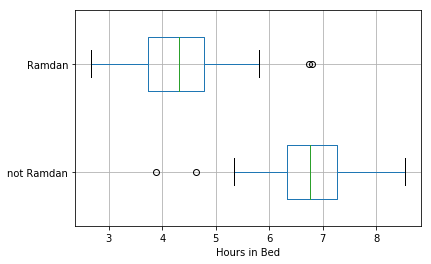

In [10]:
ramdan_events_df.boxplot(column = 'time_in_bed', by = 'event_type', positions = [2, 1], 
           vert = False, widths = 0.5)
plt.xlabel('Hours in Bed')
plt.suptitle('')
plt.title('');
plt.savefig("RamadanBoxplot.png",bbox_inches='tight')

using scipy t-test i want to check if the two dataframes are differnt. a low p-value would confirm the hypothesis

In [11]:
scipy.stats.ttest_ind(ramadan_df['time_in_bed'], non_ramadan_data['time_in_bed'])

Ttest_indResult(statistic=-14.441310842407745, pvalue=1.2340459086054766e-31)

Comparing the time in bed between the two time-frames 

In [12]:
print 'ramdan hours in bed'
print ramadan_df['time_in_bed'].describe()
print 
print 'non ramdan hours in bed'
print non_ramadan_data['time_in_bed'].describe()

ramdan hours in bed
count    26.000000
mean      4.387179
std       1.075870
min       2.666667
25%       3.737500
50%       4.316667
75%       4.783333
max       6.800000
Name: time_in_bed, dtype: float64

non ramdan hours in bed
count    151.000000
mean       6.784658
std        0.721317
min        3.883333
25%        6.325000
50%        6.766667
75%        7.266667
max        8.533333
Name: time_in_bed, dtype: float64


Comparing the efficiency between the timeframes 

In [13]:
print 'Ramdan efficincy'
print ramadan_df['efficiency'].describe()
print 
print 'non Ramadan efficincy'
print non_ramadan_data['efficiency'].describe()

Ramdan efficincy
count    26.000000
mean     94.884615
std       2.196851
min      90.000000
25%      93.000000
50%      95.000000
75%      97.000000
max      99.000000
Name: efficiency, dtype: float64

non Ramadan efficincy
count    151.000000
mean      95.834437
std        2.412275
min       84.000000
25%       95.000000
50%       96.000000
75%       97.000000
max      100.000000
Name: efficiency, dtype: float64


Comparing the sleep stages minutes between the time-frames

In [14]:
sleep_stages_columns = ['deep_minutes','light_minutes','rem_minutes','wake_minutes']

ramdan_events_df.groupby('event_type')[sleep_stages_columns].mean()

,deep_minutes,light_minutes,rem_minutes,wake_minutes
event_type,,,,
Ramdan,58.692308,168.307692,36.230769,39.961538
not Ramdan,96.078431,243.202614,68.143791,53.392157


** Conculsions **
* A low p-value suggest that i slept statistically significantly slept less during ramadan.
* from the boxplots it is very clear the distiction between ramdan and rest of the data
* the mean for ramadan is 4.89 hrs of sleep compared to 6.74
* efficiency did not differ significanlty


### Sleep patterns by day of the week

** why i want to study my sleep pattern in weekend versus weekdays **
* work timings: 9:00 AM - 6:00 PM
* weekends sometimes i go out late so i sleep later than usual 


** How to compare sleep in these different timeframes**
* check the sleep stages minute
* sleep efficiency 
* time in bed
* any significant difference between weekdays versus weekends

In [15]:
dmap = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
sleep_df['Dow_mapped'] =sleep_df['day_of_week'].map(dmap)

sleep_df['day_type'] = sleep_df['Dow_mapped'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
sleep_df.head()

,bed_time,deep_count,deep_minutes,efficiency,end_date,light_count,light_minutes,minutes_asleep,rem_count,rem_minutes,start_data,wake_count,wake_minutes,wakeup_time,day_of_week,time_in_bed,Dow_mapped,day_type
0,23:18:30,4,74,97,2018-07-07,32,324,421,2,23,2018-07-06,32,80,07:39:30,Saturday,7.016667,6,Weekend
1,23:27:00,3,90,98,2018-07-06,38,272,404,10,42,2018-07-05,44,55,07:06:00,Friday,6.733333,5,Weekend
2,22:46:30,6,124,96,2018-07-05,33,270,452,9,58,2018-07-04,36,57,07:16:00,Thursday,7.533333,4,Weekday
3,23:53:30,4,85,94,2018-07-01,16,186,337,8,66,2018-06-30,19,56,06:27:00,Sunday,5.616667,0,Weekday
4,23:20:30,7,121,94,2018-06-30,32,247,397,5,29,2018-06-29,30,79,07:17:00,Saturday,6.616667,6,Weekend


Boxplot to help us visualize the difference between weekend versus weekdays

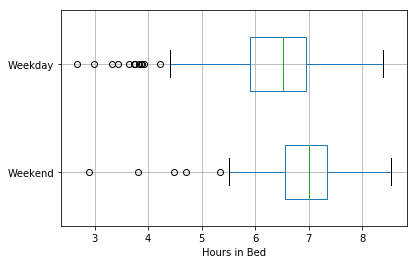

In [16]:
sleep_df.boxplot(column = 'time_in_bed', by = 'day_type', positions = [2, 1], 
           vert = False, widths = 0.5)
plt.xlabel('Hours in Bed')
plt.suptitle('')
plt.title('');

A low p-value would suggest I sleep more on weekends compared to weekdays. which is confirmed with the two boxplots illustrate this observation. 

In [17]:
import scipy.stats
# Group dataframe by weekday vs. weekend
df_weekdays = sleep_df[sleep_df.Dow_mapped < 5]
df_weekend = sleep_df[sleep_df.Dow_mapped >= 5]

scipy.stats.ttest_ind(df_weekdays['time_in_bed'], df_weekend['time_in_bed'])

Ttest_indResult(statistic=-2.812917660130251, pvalue=0.0054642896679887335)

In [18]:
print 'weekdays hours in bed'
print df_weekdays['time_in_bed'].describe()
print 
print 'weekends hours in bed'
print df_weekend['time_in_bed'].describe()

weekdays hours in bed
count    120.000000
mean       6.274722
std        1.172279
min        2.666667
25%        5.912500
50%        6.525000
75%        6.958333
max        8.383333
Name: time_in_bed, dtype: float64

weekends hours in bed
count    59.000000
mean      6.780226
std       1.038560
min       2.900000
25%       6.558333
50%       7.000000
75%       7.350000
max       8.533333
Name: time_in_bed, dtype: float64


In [19]:
sleep_df.groupby('day_type')[sleep_stages_columns].mean()

,deep_minutes,light_minutes,rem_minutes,wake_minutes
day_type,,,,
Weekday,87.458333,226.508333,62.516667,51.058333
Weekend,97.135593,244.152542,65.525424,52.220339


In [20]:
print 'weekdays efficincy'
print df_weekdays['efficiency'].describe()
print 
print 'weekends efficincy'
print df_weekend['efficiency'].describe()

weekdays efficincy
count    120.000000
mean      95.575000
std        2.539313
min       84.000000
25%       94.000000
50%       96.000000
75%       97.000000
max      100.000000
Name: efficiency, dtype: float64

weekends efficincy
count     59.000000
mean      95.864407
std        2.322733
min       87.000000
25%       95.000000
50%       96.000000
75%       97.000000
max      100.000000
Name: efficiency, dtype: float64


** Conculsions **
* A low p-value suggest that i slept statistically significantly slept less weekdays compared to weekends.
* from the boxplots it the distiction between weekdays and weekends is clear but not alot.(maybe the outliers are affecting the data)
* the mean for weekend is 6.78 hrs of sleep compared to 6.27
* efficiency did not differ significanlty


### Conculsion for results
* From this analysis we can see that we can use the descriptive statics, visual inspection and T-test w can detect the change in sleep patterns as have been illustrated above
* Ramadan does disrupt my sleep patterns.
